In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy.spatial.distance import cosine, cityblock, euclidean, squareform
from scipy.stats import spearmanr, kendalltau
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from collections import Counter
from sklearn.decomposition import PCA

# Dimensionality reduction and Clustering for conflicts detection and resolution among mining method alternatives 

## Introduction

## Nicholas first pass selection procedure

In [5]:
factor_weights = [1, 1.33, 1.33, 1.33] # Emphasis on ground control
# factor_weights = [1, 0.75, 0.6, 0.38]  # Emphasis on grade control
# factor_weights = [1, 1, 0.8, 0.5]  # Emphasis on grade control and geomechanical state of ore zone

In [6]:
ore_geometry_list = ['S_Massive', 
                     'S_Tabular',
                     'S_Inclined',
                     'T_Narrow',
                     'T_Intermediate',
                     'T_Thick',
                     'T_Very_thick',
                     'P_Flat',
                     'P_Intermediate',
                     'P_Steep',
                     'GD_Uniform',
                     'GD_Gradational',
                     'GD_Erratic']

In [7]:
ore_ground_cond_list = ['O_RSS_Weak',
                        'O_RSS_Moderate',
                        'O_RSS_Strong',
                        'O_FF_Very_close',
                        'O_FF_Close',
                        'O_FF_Wide',
                        'O_FF_Very_wide',
                        'O_FSS_Weak',
                        'O_FSS_Moderate',
                        'O_FSS_Strong']

In [8]:
hw_ground_cond_list = ['HW_RSS_Weak',
                       'HW_RSS_Moderate',
                       'HW_RSS_Strong',
                       'HW_FF_Very_close',
                       'HW_FF_Close',
                       'HW_FF_Wide',
                       'HW_FF_Very_wide', 
                       'HW_FSS_Weak',
                       'HW_FSS_Moderate',
                       'HW_FSS_Strong']

In [9]:
fw_ground_cond_list = ['FW_RSS_Weak',
                       'FW_RSS_Moderate',
                       'FW_RSS_Strong',
                       'FW_FF_Very_close',
                       'FW_FF_Close',
                       'FW_FF_Wide',
                       'FW_FF_Very_wide',
                       'FW_FSS_Weak',
                       'FW_FSS_Moderate',
                       'FW_FSS_Strong']

In [10]:
methods_df = pd.read_csv("Nicholas_mining_methods.csv")
methods_df = methods_df.set_index(methods_df.columns[0])

methods_df[ore_geometry_list] = methods_df[ore_geometry_list] * factor_weights[0]
methods_df[ore_ground_cond_list] = methods_df[ore_ground_cond_list] * factor_weights[1]
methods_df[hw_ground_cond_list] = methods_df[hw_ground_cond_list] * factor_weights[2]
methods_df[fw_ground_cond_list] = methods_df[fw_ground_cond_list] * factor_weights[3]

methods_df.index.name = None

methods_df.head(5)

,S_Massive,S_Tabular,S_Inclined,T_Narrow,T_Intermediate,T_Thick,T_Very_thick,P_Flat,P_Intermediate,P_Steep,...,FW_RSS_Weak,FW_RSS_Moderate,FW_RSS_Strong,FW_FF_Very_close,FW_FF_Close,FW_FF_Wide,FW_FF_Very_wide,FW_FSS_Weak,FW_FSS_Moderate,FW_FSS_Strong
Open-pit mining,3,2,3,2,3,4,4,3,3,4,...,3.99,5.32,5.32,2.66,3.99,5.32,5.32,2.66,3.99,5.32
Block caving,4,2,0,-49,0,2,4,3,2,4,...,2.66,3.99,3.99,1.33,3.99,3.99,3.99,1.33,3.99,3.99
Sublevel stoping,2,2,1,1,2,4,3,2,1,4,...,0.00,2.66,5.32,0.00,0.00,2.66,5.32,0.00,1.33,5.32
Sublevel caving,3,4,1,-49,0,4,4,1,1,4,...,0.00,2.66,5.32,0.00,1.33,3.99,5.32,0.00,2.66,5.32
Longwall mining,-49,4,-49,4,0,-49,-49,4,0,-49,...,2.66,3.99,3.99,1.33,2.66,5.32,3.99,1.33,3.99,3.99


### Application of the Nicholas selection procedure for an exemplary ore body

#### Ore body 1

In [13]:
# # E. Bakhtavar, K. Shahriar,K. Oraee And P. Flett, 2009

conditions = ['S_Tabular', 
              'T_Thick', 
              'P_Intermediate',
              'GD_Gradational',
              'O_RSS_Moderate',
              'O_FF_Very_wide',
              'O_FSS_Weak',
              'HW_RSS_Weak',
              'HW_FF_Close',
              'HW_FSS_Weak', 
              'FW_RSS_Weak',
              'FW_FF_Close',
              'FW_FSS_Weak']

#### Ore body 2

In [15]:
# D. Stefanov, I. Garkov, 2016

conditions = ['S_Massive', 
              'T_Thick', 
              'P_Steep',
              'GD_Gradational',
              'O_RSS_Moderate',
              'O_FF_Wide',
              'O_FSS_Moderate',
              'HW_RSS_Weak',
              'HW_FF_Wide',
              'HW_FSS_Weak', 
              'FW_RSS_Weak',
              'FW_FF_Wide',
              'FW_FSS_Weak']

#### Ore body 3

In [17]:
# # S. Mihalkovski, Z. Despodov, 2020

# conditions = ['S_Tabular', 
#               'T_Intermediate', 
#               'P_Intermediate',
#               'GD_Erratic',
#               'O_RSS_Moderate',
#               'O_FF_Wide',
#               'O_FSS_Weak',
#               'HW_RSS_Moderate',
#               'HW_FF_Close',
#               'HW_FSS_Weak', 
#               'FW_RSS_Moderate',
#               'FW_FF_Close',
#               'FW_FSS_Weak']

C:\Users\dimit\AppData\Local\Temp\ipykernel_8128\1016262335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deposit_methods_df["Total score"] = deposit_methods_df.sum(axis=1)
C:\Users\dimit\AppData\Local\Temp\ipykernel_8128\1016262335.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_deposit_methods_df = deposit_methods_df.drop("Open-pit mining")[deposit_methods_df['Total score'] > 0] # Comment out if open-pit mining is under consideration
C:\Users\dimit\AppData\Local\Temp\ipykernel_8128\1016262335.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_deposit_methods_df = filtered_deposit_methods_df[deposit_methods_df['Total score'] > 0]


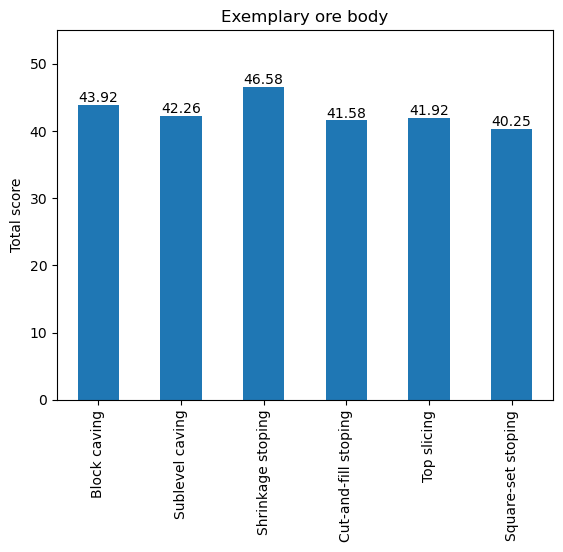

In [18]:
deposit_methods_df = methods_df[conditions]
deposit_methods_df["Total score"] = deposit_methods_df.sum(axis=1)

filtered_deposit_methods_df = deposit_methods_df.drop("Open-pit mining")[deposit_methods_df['Total score'] > 0] # Comment out if open-pit mining is under consideration
filtered_deposit_methods_df = filtered_deposit_methods_df[deposit_methods_df['Total score'] > 0]
#filtered_deposit_methods_df = deposit_methods_df[deposit_methods_df['Total score'] > 0]

filtered_deposit_methods_df["Total score"].plot(kind='bar')
for index, value in enumerate(filtered_deposit_methods_df["Total score"]):
    plt.annotate("{:.2f}".format(value), xy=(index, value), ha='center', va='bottom')

plt.ylim(0,55)
plt.ylabel("Total score")
plt.title('Exemplary ore body')

# plt.savefig('Nicholas_bar_chart.png', bbox_inches='tight')

plt.show()

In [19]:
filtered_deposit_methods_df.to_csv('filtered_Nicholas.csv')

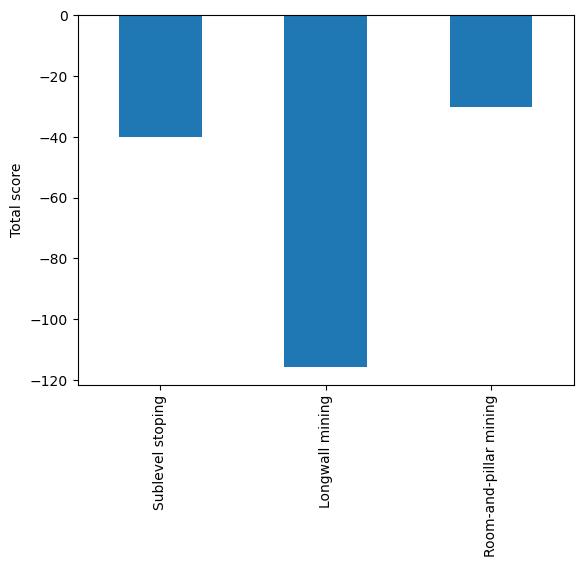

In [20]:
if len(deposit_methods_df[deposit_methods_df['Total score'] <= 0].index) > 0:
    df = deposit_methods_df[deposit_methods_df['Total score'] <= 0]
    df["Total score"].plot(kind='bar')
    
    plt.ylabel("Total score")
    plt.show()
else:
    print("All mining methods are potentially feasible.")

## Clustering methods based on raw Nicholas scores

Note: If specific mining methods need to be evaluated, remove the comment symbol from the code below and write down your desired mining methods.

In [24]:
# specific_methods = ['Sublevel caving', 'Shrinkage stoping', 'Sublevel stoping', 'Cut-and-fill stoping']
# filtered_deposit_methods_df = filtered_deposit_methods_df.loc[specific_methods]

Considered distance measures

In [26]:
dist_list = [
    'Euclidean dist.', 
    'Manhattan dist.', 
    'Cosine dist.', 
    'Kendall corr. dist.', 
    'Spearman corr. dist.'
]

link_method_list = [
    'Single link.', 
    'Complete link.', 
    'Average link.'
]

In [27]:
def calc_nicholas_distance_matrix(df):
    dist_matrix = pd.DataFrame(index=df.index, columns=df.index, dtype=float)
    for i in df.index:
        for j in df.index:
            dist_matrix.loc[i, j] = np.abs(df.loc[i]["Total score"] - df.loc[j]["Total score"])
    return dist_matrix

In [28]:
def calc_euclidean_distance_matrix(df):
    dist_matrix = pd.DataFrame(index=df.index, columns=df.index, dtype=float)
    for i in df.index:
        for j in df.index:
            dist_matrix.loc[i, j] = euclidean(df.loc[i], df.loc[j])
    return dist_matrix

In [29]:
def calc_manhattan_distance_matrix(df):
    dist_matrix = pd.DataFrame(index=df.index, columns=df.index, dtype=float)
    for i in df.index:
        for j in df.index:
            dist_matrix.loc[i, j] = cityblock(df.loc[i], df.loc[j])
    return dist_matrix

In [30]:
def calc_cosine_distance_matrix(df):
    dist_matrix = pd.DataFrame(index=df.index, columns=df.index, dtype=float)
    for i in df.index:
        for j in df.index:
            dist_matrix.loc[i, j] = cosine(df.loc[i], df.loc[j])
    return dist_matrix

In [31]:
def calc_spearman_distance_matrix(df):
    dist_matrix = pd.DataFrame(index=df.index, columns=df.index, dtype=float)
    for i in df.index:
        for j in df.index:
            dist_matrix.loc[i, j], _ = spearmanr(df.loc[i], df.loc[j])
    return dist_matrix

In [32]:
def calc_kendall_distance_matrix(df):
    dist_matrix = pd.DataFrame(index=df.index, columns=df.index, dtype=float)
    for i in df.index:
        for j in df.index:
            dist_matrix.loc[i, j], _ = kendalltau(df.loc[i], df.loc[j])
    return dist_matrix

In [33]:
def hierarchical_clustering(dist_matrix, linkage_method, dissimilarity):
    linkage_matrix = linkage(squareform(dist_matrix), method=linkage_method_dict[m])
    threshold = dissimilarity * np.max(linkage_matrix[:, 2])
    
    # Extract clusters based on the threshold
    clusters = fcluster(linkage_matrix, t=threshold, criterion='distance')
    
    # Create a dictionary to hold cluster members
    cluster_dict = {}
    for idx, cluster_id in enumerate(clusters):
        if cluster_id not in cluster_dict:
            cluster_dict[cluster_id] = []
        cluster_dict[cluster_id].append(dist_matrix.index[idx])
    
    filtered_cluster_dict = {}
    for cluster_id, members in cluster_dict.items():
        if len(members) > 1:  # Filter out clusters with only one item
            filtered_cluster_dict[cluster_id] = members

    return filtered_cluster_dict
    
    # return cluster_dict

In [34]:
nicholas_dist_matrix = calc_nicholas_distance_matrix(filtered_deposit_methods_df)
eucl_dist_matrix = calc_euclidean_distance_matrix(filtered_deposit_methods_df.drop("Total score", axis=1)).round(decimals=4)
manh_dist_matrix = calc_manhattan_distance_matrix(filtered_deposit_methods_df.drop("Total score", axis=1))
cos_dist_matrix = calc_cosine_distance_matrix(filtered_deposit_methods_df.drop("Total score", axis=1)).round(decimals=4)
spear_dist_matrix = 1 - calc_spearman_distance_matrix(filtered_deposit_methods_df.drop("Total score", axis=1)).round(decimals=4)
kendall_dist_matrix = 1 - calc_kendall_distance_matrix(filtered_deposit_methods_df.drop("Total score", axis=1)).round(decimals=4)

In [35]:
dist_matrix_dict = {'Nicholas score difference': nicholas_dist_matrix,
                    'Euclidean dist.': eucl_dist_matrix, 
                    'Manhattan dist.': manh_dist_matrix, 
                    'Cosine dist.': cos_dist_matrix, 
                    'Spearman corr. dist.': spear_dist_matrix, 
                    'Kendall corr. dist.': kendall_dist_matrix}

linkage_method_dict = {'Single link.': 'single', 
                       'Complete link.':'complete', 
                       #'Centroid link.': 'centroid',
                       'Average link.':'average'
                      }

In [36]:
results_dict = {}
results_list_dict = {}
results_count_dict = {}
step_size = 0.01

In [37]:
for dist in dist_matrix_dict.keys():
    for m in linkage_method_dict.keys():
        dissimilarity_dict = {}
        dissimilarity_count_dict = {}
        for dissimilarity in np.arange(0, 1 + step_size, step_size):
            dissimilarity = dissimilarity.round(decimals=2)

            
            clusters = hierarchical_clustering(dist_matrix_dict[dist], linkage_method_dict[m], dissimilarity)
            dissimilarity_dict[dissimilarity] = []
            dissimilarity_count_dict[dissimilarity] = []
            
            for cluster_id, members in clusters.items():
                dissimilarity_dict[dissimilarity].append(set(members))
                results_list_dict
                
            dist_linkage = f'{dist} - {m}'
            results_dict[dist_linkage] = dissimilarity_dict
            
            
            clusters = results_dict[dist_linkage].values()
            for c in clusters:
                if len(c)== 0:
                    dissimilarity_count_dict[dissimilarity] = 0.0
                else:
                    count = 0
                    for items in c:
                        count += len(items)
                        dissimilarity_count_dict[dissimilarity] = count / len(filtered_deposit_methods_df)

            results_count_dict[dist_linkage] = dissimilarity_count_dict

In [38]:
similarity = 0.8
dissimilarity = 1 - similarity
dissimilarity = round(dissimilarity, 2)
dissimilarity

0.2

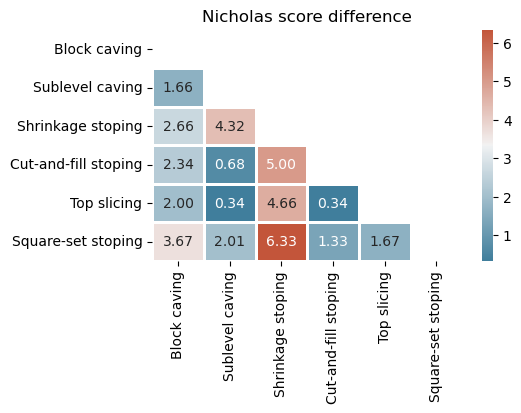

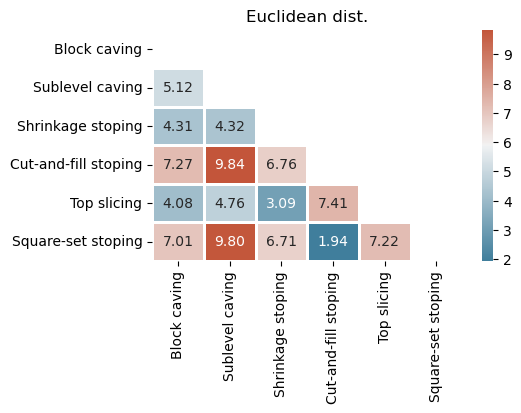

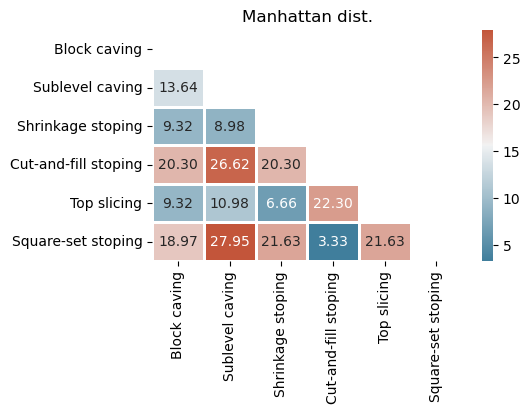

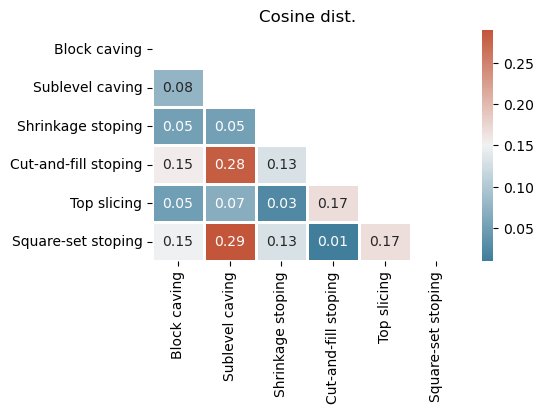

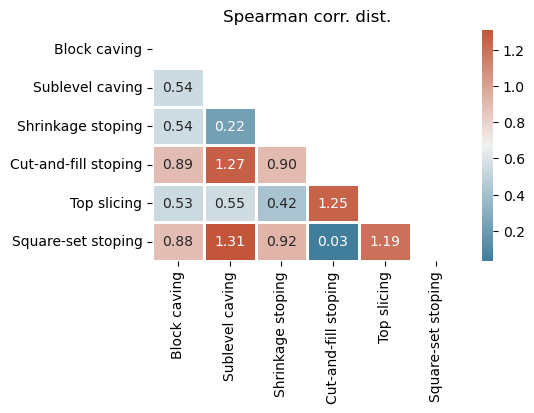

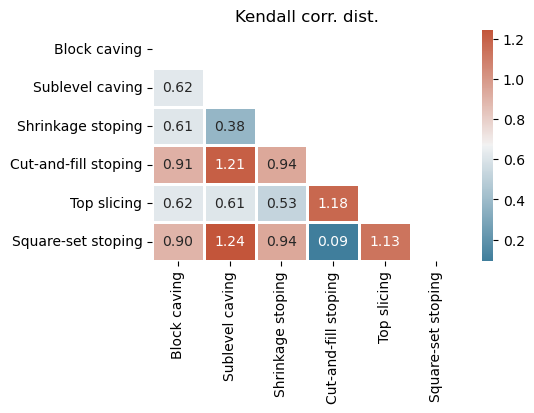

In [39]:
for dist in dist_matrix_dict.keys():
    mask = np.triu(np.ones_like(dist_matrix_dict[dist], dtype=bool))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
    plt.figure(figsize=(5, 3))
    sns.heatmap(dist_matrix_dict[dist], 
                mask=mask, 
                annot=True, 
                cmap=cmap, 
                linewidths=1, 
                fmt='.2f')
    plt.title(dist)

    # plt.savefig(f'matrix_{dist}.png', bbox_inches='tight')

plt.show()

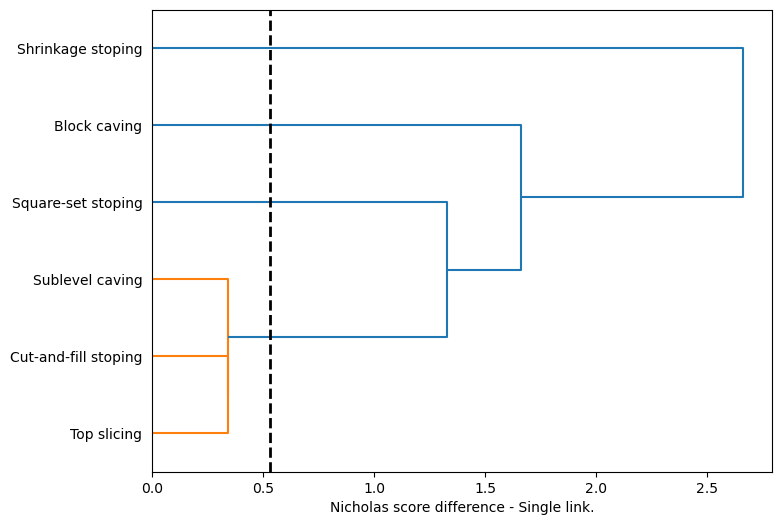

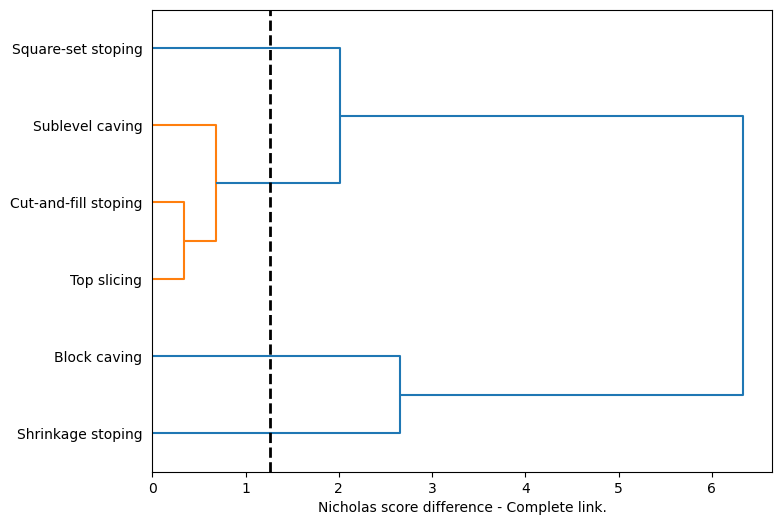

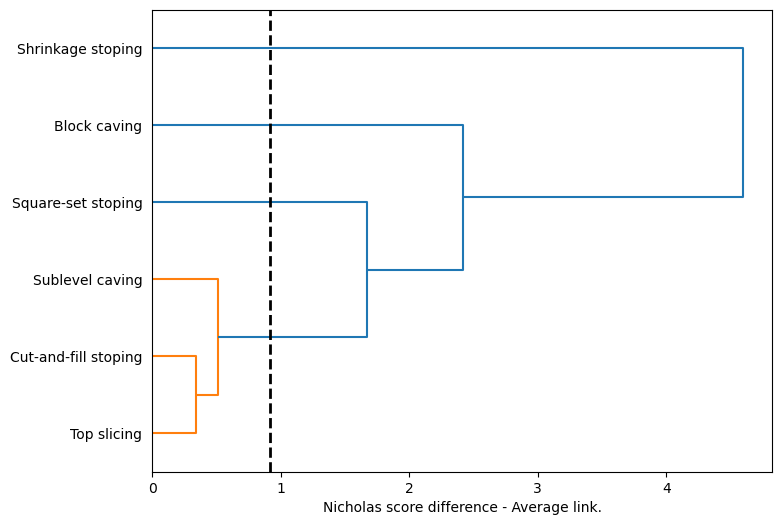

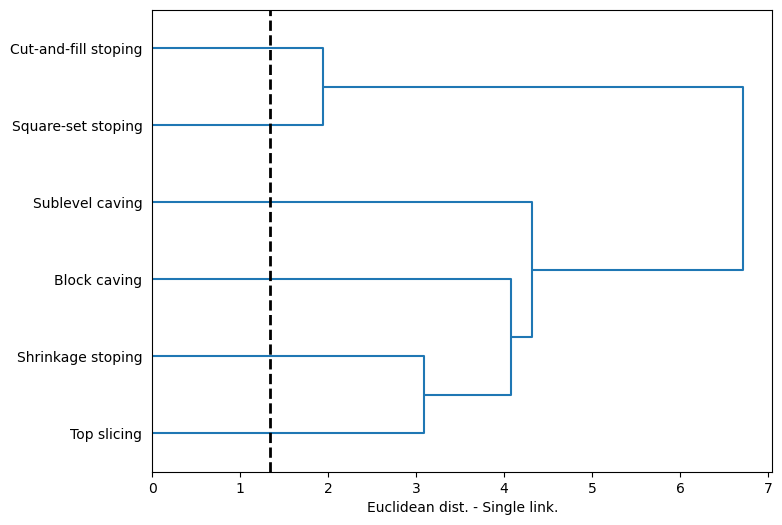

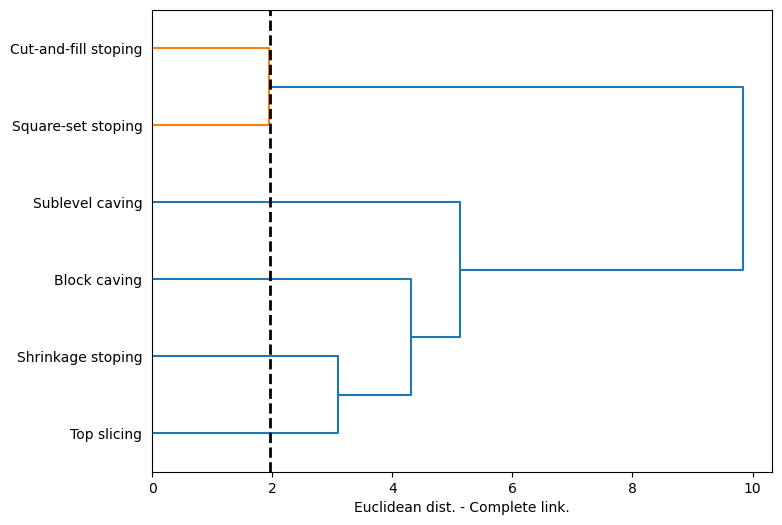

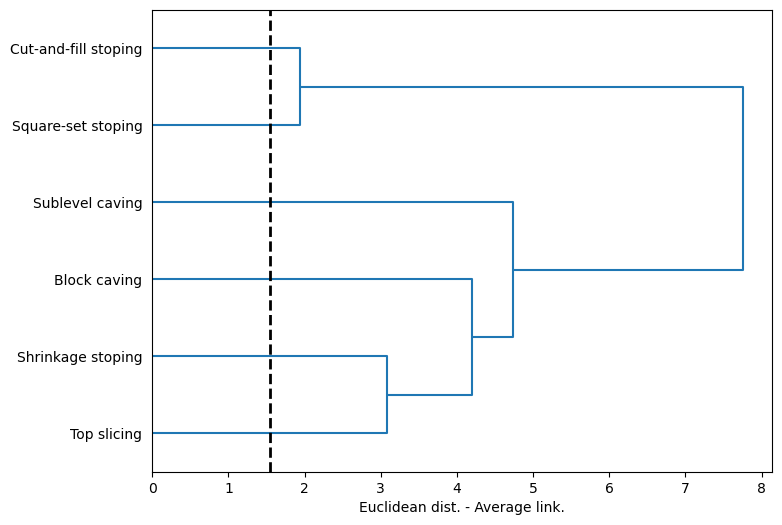

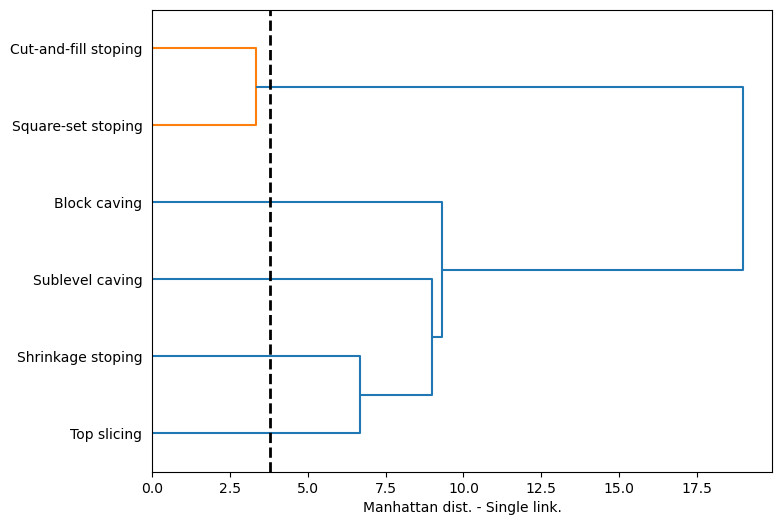

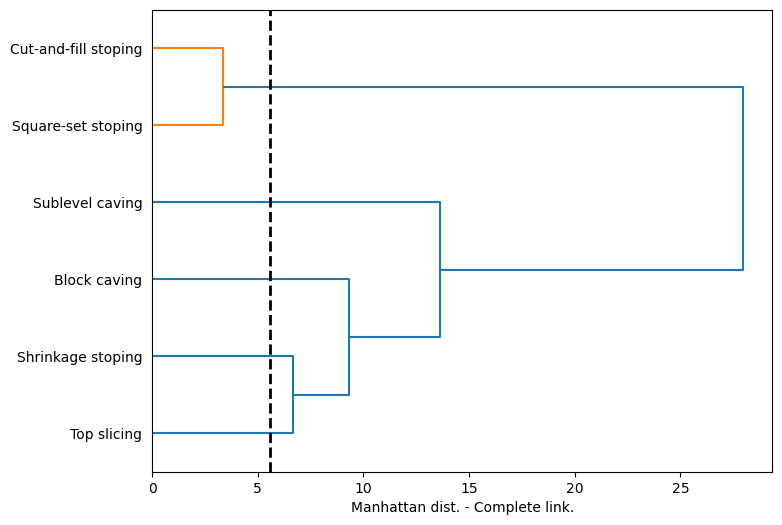

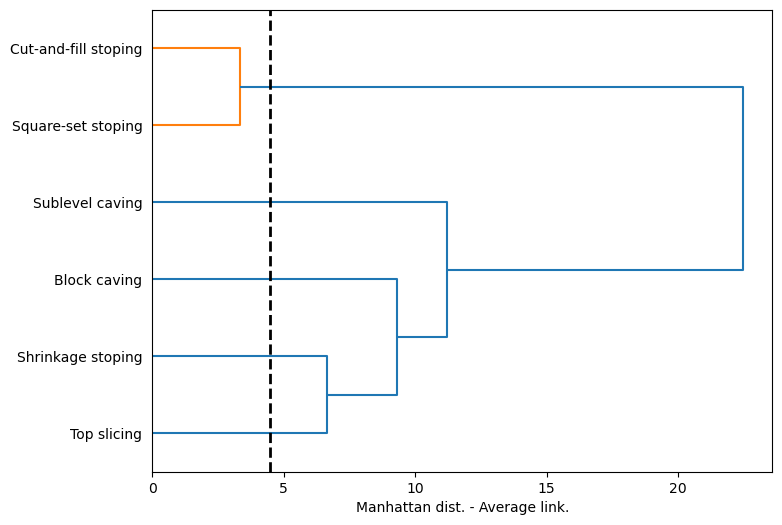

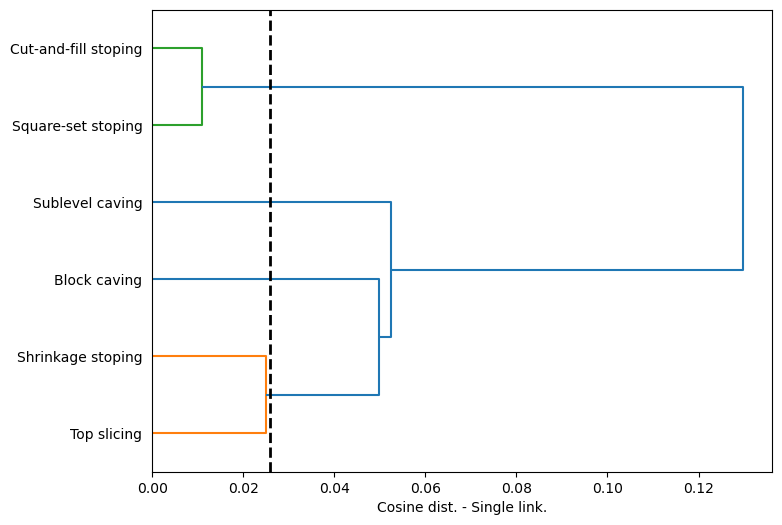

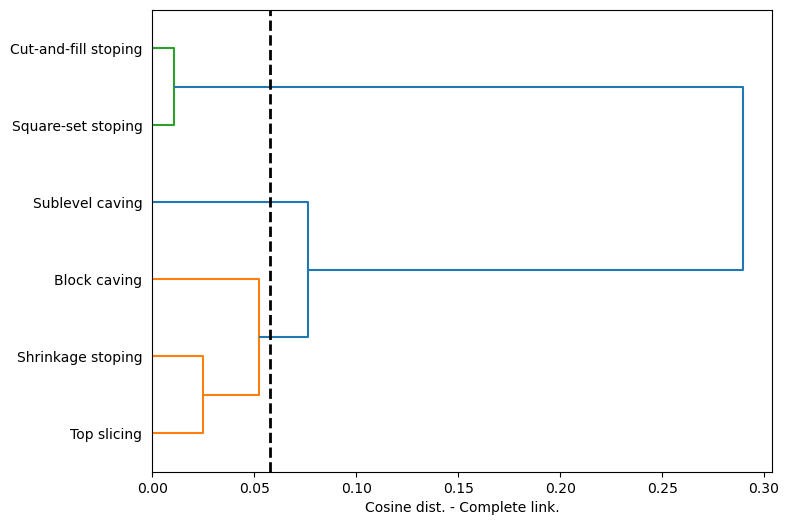

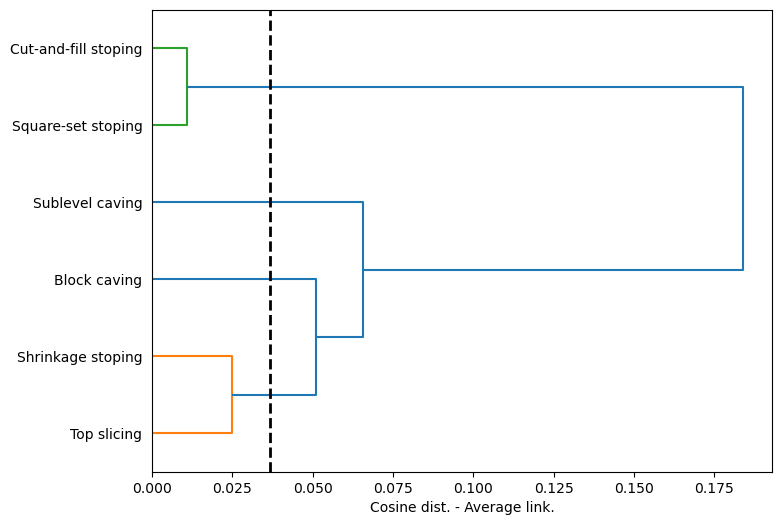

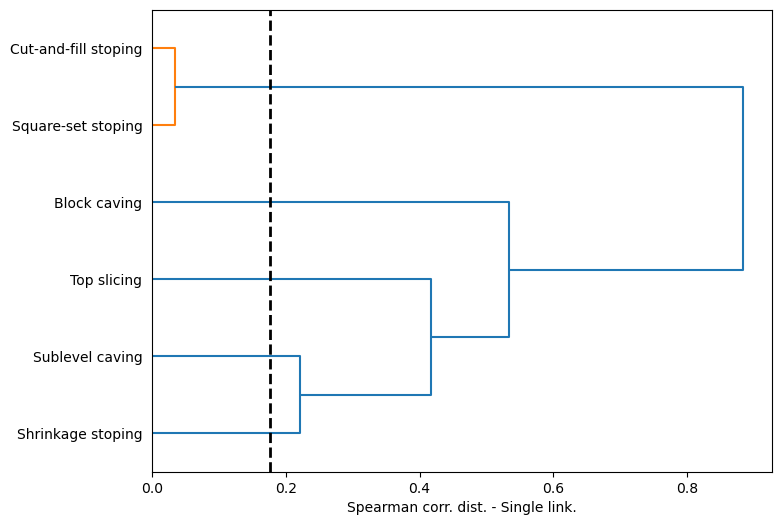

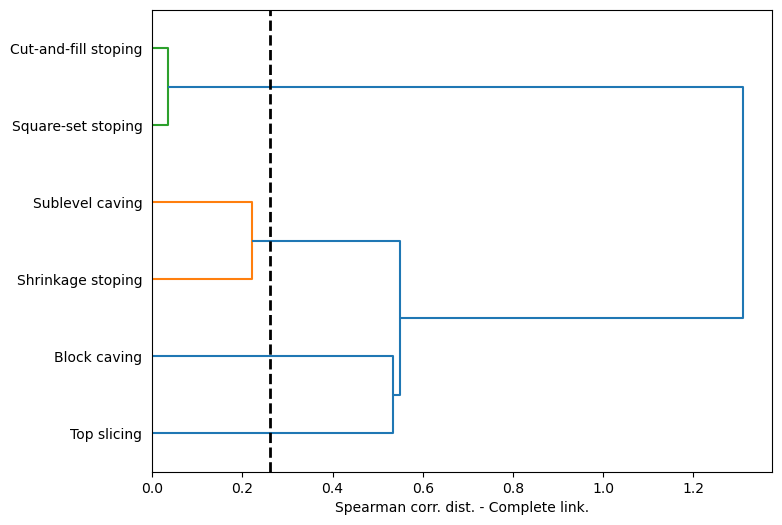

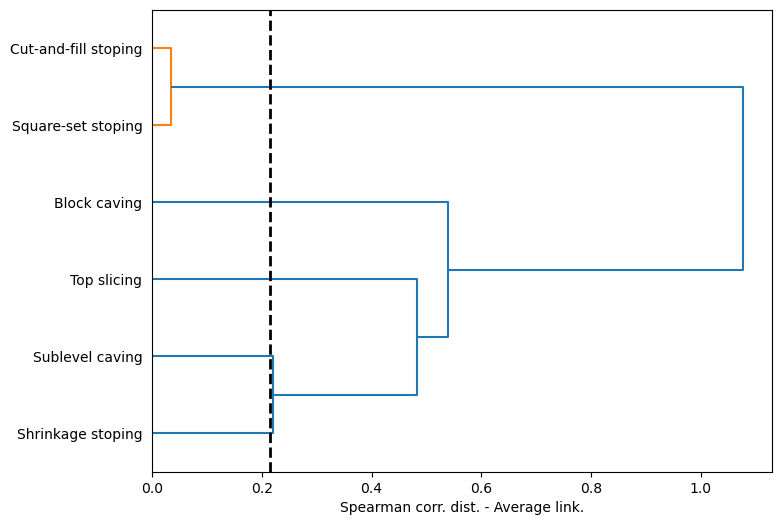

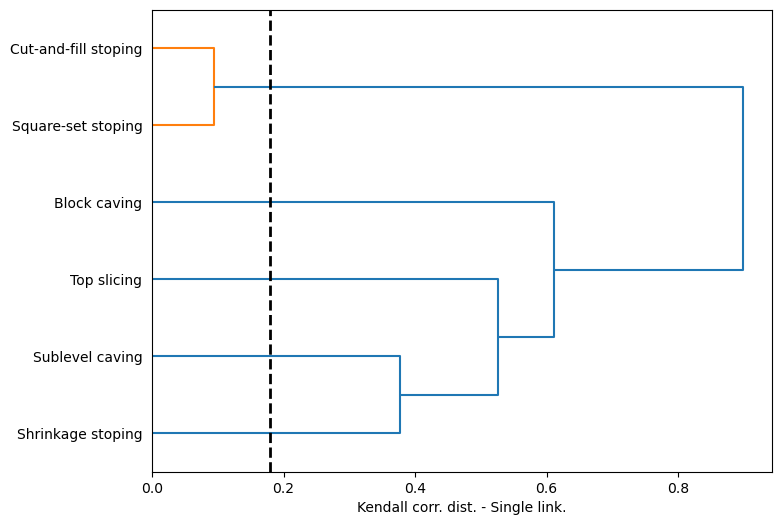

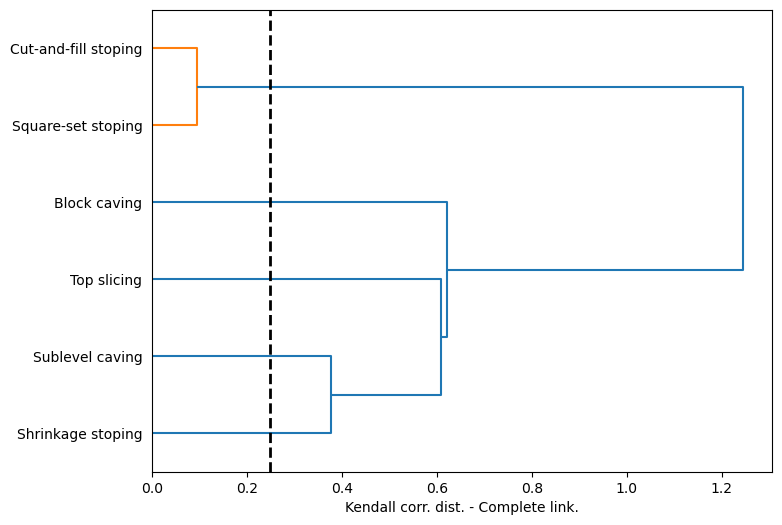

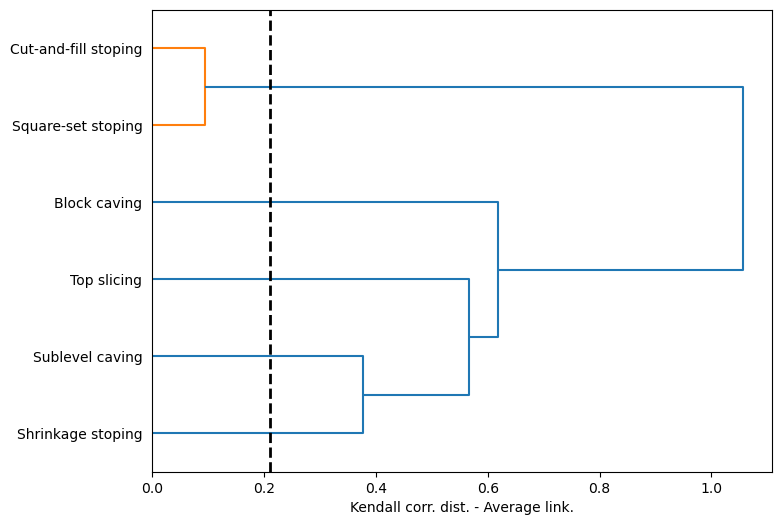

In [40]:
for dist in dist_matrix_dict.keys():
    # if dist == 'Nicholas score difference':
    #    continue
    for m in linkage_method_dict.keys():
        linkage_matrix = linkage(squareform(dist_matrix_dict[dist]), method=linkage_method_dict[m])
        threshold = dissimilarity * np.max(linkage_matrix[:, 2])
        
        plt.figure(figsize=(8, 6))
        dendrogram(linkage_matrix, 
                   labels=filtered_deposit_methods_df.index, 
                   orientation='right', 
                   distance_sort='descending', 
                   leaf_font_size=10, 
                   color_threshold=threshold)
        plt.xlabel(f"{dist} - {m}")
        plt.axvline(x=threshold, color='black', linestyle='--', linewidth=2, label='Similarity threshold')
        #plt.savefig(f"dendrogram_{dist}_{m}.png", bbox_inches='tight')
plt.show()

In [41]:
dist_matrices_df = pd.DataFrame({'Nicholas score difference': list(nicholas_dist_matrix.stack()), 
                                 'Euclidean distance': list(eucl_dist_matrix.stack()), 
                                 'Manhattan distance': list(manh_dist_matrix.stack()), 
                                 'Cosine similarity': list(cos_dist_matrix.stack()), 
                                 'Spearman correlation': list(spear_dist_matrix.stack()), 
                                 'Kendal correlation': list(kendall_dist_matrix.stack())})
dist_matrices_df = dist_matrices_df[dist_matrices_df['Nicholas score difference'] !=0]

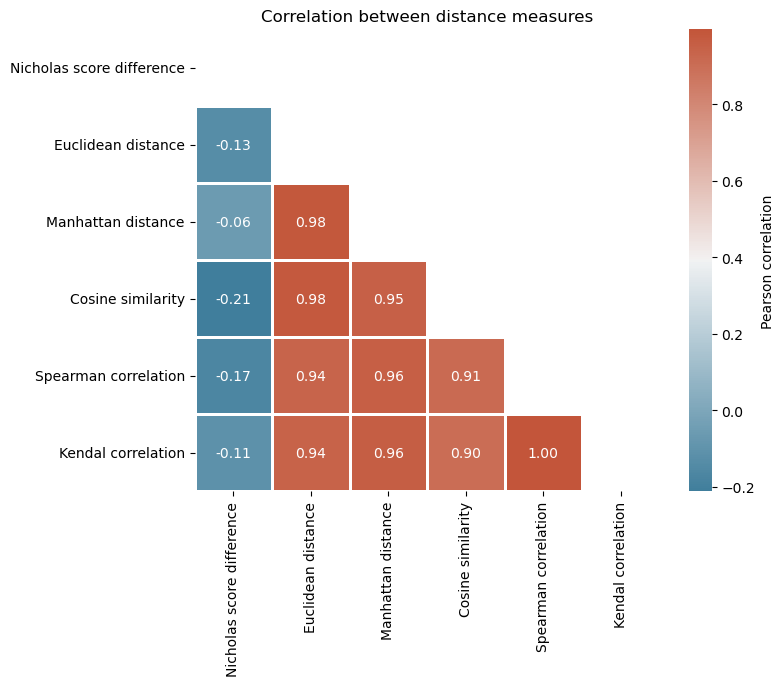

In [42]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corr_matrix = dist_matrices_df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(7.5, 6))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap=cmap, 
            mask=mask, 
            annot_kws={"size": 10},
            linewidths=1,
            fmt='.2f',
            cbar_kws={'label': 'Pearson correlation'})
plt.title('Correlation between distance measures')

# plt.savefig('Correlogram_distances.png', bbox_inches='tight')

plt.show()

In [43]:
def plot_nicholas_clustermap(df, width=8, height=8):
    nicholas_cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.clustermap(df, 
                   cmap=nicholas_cmap, 
                   figsize=(width, height), 
                   annot=True, 
                   metric='cosine', 
                   method='complete',
                   linewidths=1, 
                   fmt='.2f',
                   cbar_pos=(1.02, 0.2, 0.03, 0.6), 
                   cbar_kws={'label': 'Nicholas scores'})

plt.show()

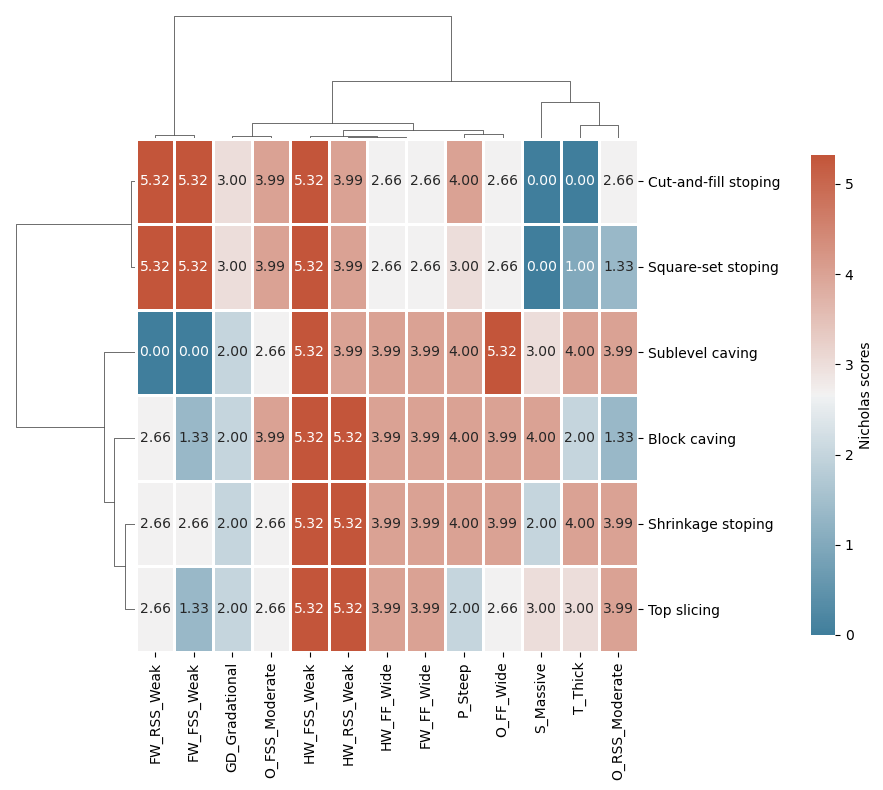

In [44]:
plot_nicholas_clustermap(filtered_deposit_methods_df.drop("Total score", axis=1))

plt.savefig('Nicholas_heatmap_full.png', bbox_inches='tight')

In [45]:
# specific_df = filtered_deposit_methods_df.loc[specific_methods]
# plot_nicholas_clustermap(specific_df.drop("Total score", axis=1), 9, 4)

# plt.savefig('Nicholas_heatmap_partial.png', bbox_inches='tight')

## Latent space embeddings of raw Nicholas scores, based on methods for dimensionality reduciton

### Correspondence analysis based on set occurences from original feature space and results from Hierarchical clustering

In [46]:
distance_measures = {}

In [47]:
for dist in dist_list:
    for link_method in link_method_list:
        key = f"{dist} - {link_method}"
        distance_measures[key] = results_dict[key][dissimilarity]

In [48]:
distance_measures

{'Euclidean dist. - Single link.': [],
 'Euclidean dist. - Complete link.': [{'Cut-and-fill stoping',
   'Square-set stoping'}],
 'Euclidean dist. - Average link.': [],
 'Manhattan dist. - Single link.': [{'Cut-and-fill stoping',
   'Square-set stoping'}],
 'Manhattan dist. - Complete link.': [{'Cut-and-fill stoping',
   'Square-set stoping'}],
 'Manhattan dist. - Average link.': [{'Cut-and-fill stoping',
   'Square-set stoping'}],
 'Cosine dist. - Single link.': [{'Shrinkage stoping', 'Top slicing'},
  {'Cut-and-fill stoping', 'Square-set stoping'}],
 'Cosine dist. - Complete link.': [{'Block caving',
   'Shrinkage stoping',
   'Top slicing'},
  {'Cut-and-fill stoping', 'Square-set stoping'}],
 'Cosine dist. - Average link.': [{'Shrinkage stoping', 'Top slicing'},
  {'Cut-and-fill stoping', 'Square-set stoping'}],
 'Kendall corr. dist. - Single link.': [{'Cut-and-fill stoping',
   'Square-set stoping'}],
 'Kendall corr. dist. - Complete link.': [{'Cut-and-fill stoping',
   'Square-set

In [49]:
data = []

for key, clusters in distance_measures.items():
    linkage_method = key.split(" - ")[1]
    for cluster in clusters:
        data.append([linkage_method, frozenset(cluster), 1])

# Create a DataFrame
df = pd.DataFrame(data, columns=["Distance_Method", "Conflicts set", "Count"])

# Pivot the DataFrame
pivot_table = df.pivot_table(index="Distance_Method", columns="Conflicts set", values="Count", aggfunc="sum", fill_value=0)
pivot_table_t = pivot_table.T
pivot_table_t["Total occurences"] = pivot_table_t["Average link."] + pivot_table_t["Complete link."] + pivot_table_t["Single link."]
# pivot_table_t["Total occurences"] = pivot_table_t["Average link."] + pivot_table_t["Complete link."]

# Print the pivot table
pivot_table_t["Total occurences"]

Conflicts set
(Square-set stoping, Cut-and-fill stoping)        13
(Top slicing, Shrinkage stoping)                   2
(Top slicing, Shrinkage stoping, Block caving)     1
(Shrinkage stoping, Sublevel caving)               1
Name: Total occurences, dtype: int64

### PCA of raw Nicholas scores

In [51]:
filtered_deposit_methods_tr_df = filtered_deposit_methods_df.drop(columns=['Total score']).transpose()

In [52]:
df = filtered_deposit_methods_df.drop(columns=['Total score'])

In [53]:
df

,S_Massive,T_Thick,P_Steep,GD_Gradational,O_RSS_Moderate,O_FF_Wide,O_FSS_Moderate,HW_RSS_Weak,HW_FF_Wide,HW_FSS_Weak,FW_RSS_Weak,FW_FF_Wide,FW_FSS_Weak
Block caving,4,2,4,2,1.33,3.99,3.99,5.32,3.99,5.32,2.66,3.99,1.33
Sublevel caving,3,4,4,2,3.99,5.32,2.66,3.99,3.99,5.32,0.00,3.99,0.00
Shrinkage stoping,2,4,4,2,3.99,3.99,2.66,5.32,3.99,5.32,2.66,3.99,2.66
Cut-and-fill stoping,0,0,4,3,2.66,2.66,3.99,3.99,2.66,5.32,5.32,2.66,5.32
Top slicing,3,3,2,2,3.99,2.66,2.66,5.32,3.99,5.32,2.66,3.99,1.33
Square-set stoping,0,1,3,3,1.33,2.66,3.99,3.99,2.66,5.32,5.32,2.66,5.32


In [54]:
df.shape

(6, 13)

In [55]:
f = list(df.columns)

In [56]:
pca = PCA(n_components=4)
components = pca.fit_transform(df[f])
pca.explained_variance_ratio_

array([0.77425296, 0.10395198, 0.07517087, 0.02963272])

In [57]:
pca_df = pd.DataFrame(data=components, columns=['pca1', 'pca2', 'pca3', 'pca4'])
pca_df.index = list(df.transpose().columns)

pca_df

,pca1,pca2,pca3,pca4
Block caving,-1.518865,2.799863,-0.068824,0.390613
Sublevel caving,-4.805413,-0.649927,-1.569043,-0.710509
Shrinkage stoping,-1.488139,-1.397343,0.107854,1.363482
Cut-and-fill stoping,4.911543,-0.406869,-0.537730,-0.254446
Top slicing,-1.911302,-0.403369,2.200229,-0.632895
Square-set stoping,4.812176,0.057646,-0.132486,-0.156246


C:\Users\dimit\AppData\Local\Temp\ipykernel_8128\4199808461.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(pca_df['pca1'][i], pca_df['pca2'][i], label, size=8.5)


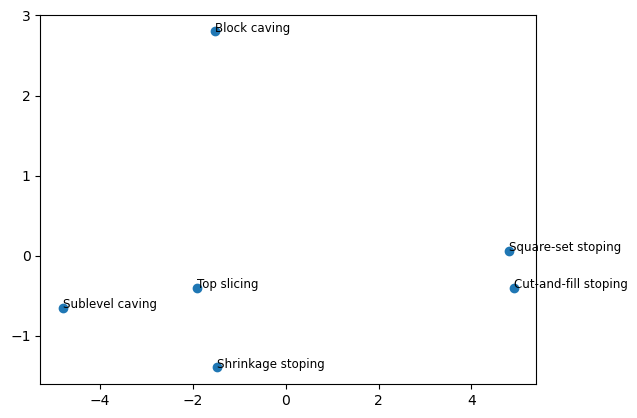

In [58]:
plt.scatter(pca_df['pca1'], pca_df['pca2'])

for i, label in enumerate(pca_df.index.to_list()):
    plt.text(pca_df['pca1'][i], pca_df['pca2'][i], label, size=8.5)

### tSNE of raw Nicholas scores

In [60]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

In [138]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=12, perplexity=2, learning_rate=50)
tsne_results = tsne.fit_transform(df)

# Create a DataFrame with t-SNE results and gender
tsne_df = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
tsne_df.index = pca_df.index.to_list()
tsne_df

,tsne1,tsne2
Block caving,36.413162,72.500755
Sublevel caving,-153.681992,134.611771
Shrinkage stoping,-83.071198,92.738716
Cut-and-fill stoping,15.176409,-248.084625
Top slicing,-39.990410,51.053932
Square-set stoping,70.877739,-232.070053


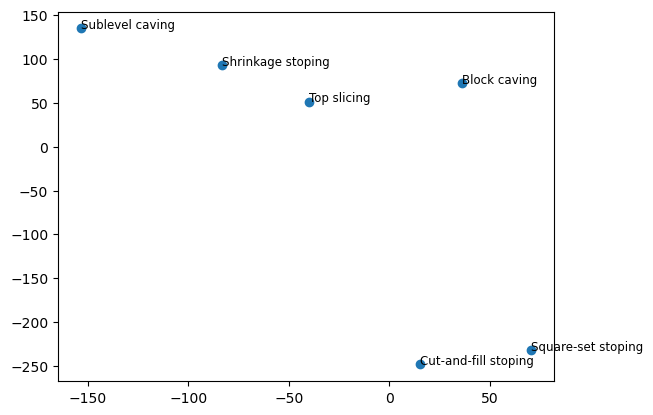

In [71]:
plt.scatter(tsne_df['tsne1'], tsne_df['tsne2'])

for i, label in enumerate(pca_df.index.to_list()):
    plt.text(tsne_df['tsne1'][i], tsne_df['tsne2'][i], label, size=8.5)

### Locally Linear Embedding of raw Nicholas scores

In [106]:
from sklearn.manifold import LocallyLinearEmbedding

In [140]:
lle = LocallyLinearEmbedding(n_components=2, 
                             random_state=42, 
                             n_neighbors=3)

lle_results = lle.fit_transform(df)

lle_df = pd.DataFrame(lle_results, columns=['lle1', 'lle2'])
lle_df.index = pca_df.index.to_list()
lle_df

,lle1,lle2
Block caving,-0.288585,-0.481166
Sublevel caving,-0.289043,0.741092
Shrinkage stoping,-0.288176,0.172439
Cut-and-fill stoping,0.585813,0.038988
Top slicing,-0.288814,-0.431789
Square-set stoping,0.568803,-0.039563


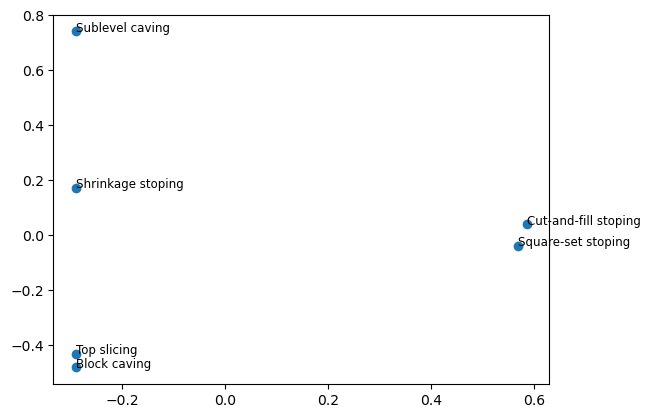

In [120]:
plt.scatter(lle_df['lle1'], lle_df['lle2'])

for i, label in enumerate(pca_df.index.to_list()):
    plt.text(lle_df['lle1'][i], lle_df['lle2'][i], label, size=8.5)

### MDS of raw Nicholas scores

In [122]:
from sklearn.manifold import MDS

In [142]:
mds = MDS(n_components=2, 
          random_state=42, 
          normalized_stress='auto')
mds_results = mds.fit_transform(df)

# Create a DataFrame with t-SNE results and gender
mds_df = pd.DataFrame(mds_results, columns=['mds1', 'mds2'])
mds_df.index = pca_df.index.to_list()
mds_df

,mds1,mds2
Block caving,-0.601780,-3.186703
Sublevel caving,4.280279,-3.167025
Shrinkage stoping,1.347717,-0.579771
Cut-and-fill stoping,-3.457315,3.765343
Top slicing,2.830774,0.867493
Square-set stoping,-4.399674,2.300664


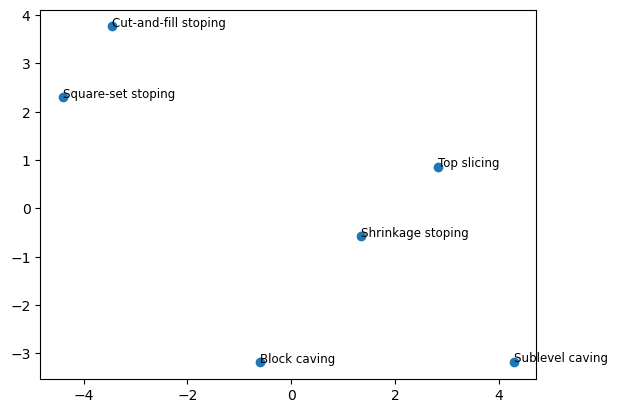

In [126]:
plt.scatter(mds_df['mds1'], mds_df['mds2'])

for i, label in enumerate(pca_df.index.to_list()):
    plt.text(mds_df['mds1'][i], mds_df['mds2'][i], label, size=8.5)

### UMAP of raw Nicholas scores

In [73]:
import umap

In [148]:
reducer = umap.UMAP(n_components=2, 
                    n_neighbors=3,
                    random_state=0, 
                    n_jobs=1)

umap_embedding = reducer.fit_transform(df)
umap_embedding_df = pd.DataFrame(umap_embedding, columns=['umap1', 'umap2'])
umap_embedding_df.index = pca_df.index.to_list()
umap_embedding_df

,umap1,umap2
Block caving,-2.947659,25.495628
Sublevel caving,-2.022225,26.087132
Shrinkage stoping,-1.601242,25.492723
Cut-and-fill stoping,-1.005123,27.088623
Top slicing,-3.051339,26.226517
Square-set stoping,-0.426676,27.297405


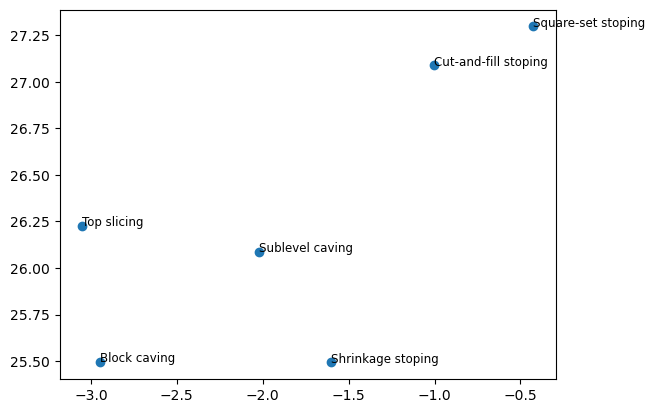

In [101]:
plt.scatter(umap_embedding_df['umap1'], umap_embedding_df['umap2'])

for i, label in enumerate(pca_df.index.to_list()):
    plt.text(umap_embedding_df['umap1'][i], umap_embedding_df['umap2'][i], label, size=8.5)